# Phyiscs Problems - Lectures 18 & 19 - Homework 9 

FALL 2023


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [19]:
G = 6.67e-11  
M = 5.97e24   
R = 6371e3    

T = float(input("desired value of T (seconds): "))


h = ((G * M * T**2) / (4 * 3.14159265359**2))**(1/3) - R


print(f"The altitude of the satellite for T = {T} seconds is approximately {h:.2f} meters.")


Enter the desired value of T (seconds): 90
The altitude of the satellite for T = 90.0 seconds is approximately -5937081.18 meters.


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [21]:
T_90_minutes = 90 * 60  

h_90_minutes = ((G * M * T_90_minutes**2) / (4 * 3.14159265359**2))**(1/3) - R

print(f"{h_90_minutes:.2f} meters.")

279321.63 meters.


In [24]:
T_45_minutes = 45 * 60  

h_45_minutes = ((G * M * T_45_minutes**2) / (4 * 3.14159265359**2))**(1/3) - R

print(f" {h_45_minutes:.2f} meters.")

 -2181559.90 meters.


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

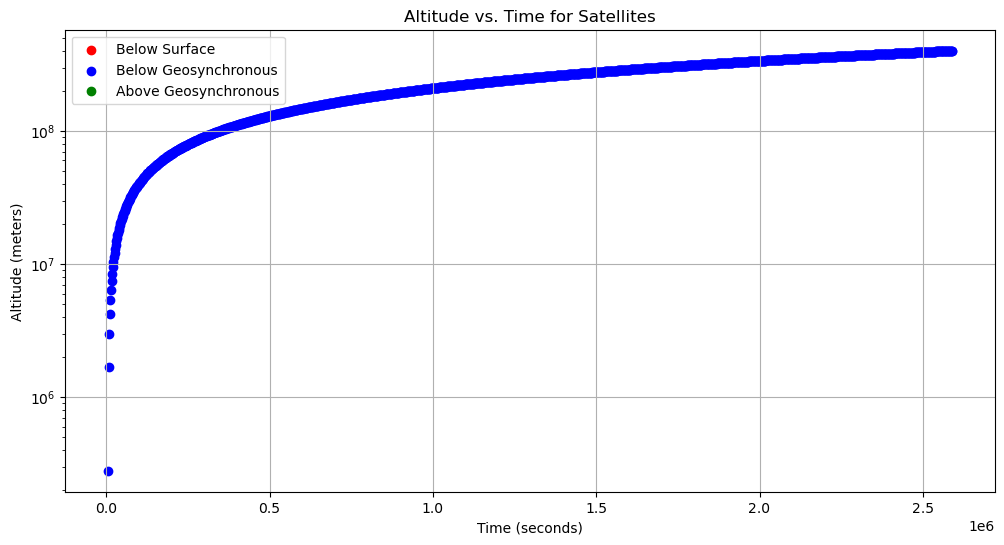

In [27]:
import matplotlib.pyplot as plt
import numpy as np

G = 6.67e-11 
M = 5.97e24   
R = 6371e3    


times = np.arange(0.5 * 3600, 30 * 24 * 3600, 0.5 * 3600)
altitudes = []

for T in times:
    h = ((G * M * T**2) / (4 * 3.14159265359**2))**(1/3) - R
    altitudes.append(h)

geosynchronous = 35_786_000
below_surface = -1  


times_below_surface = []
altitudes_below_surface = []
times_below_geosynchronous = []
altitudes_below_geosynchronous = []
times_above_geosynchronous = []
altitudes_above_geosynchronous = []

for i, altitude in enumerate(altitudes):
    if altitude < below_surface:
        times_below_surface.append(times[i])
        altitudes_below_surface.append(altitude)
    elif times[i] < geosynchronous:
        times_below_geosynchronous.append(times[i])
        altitudes_below_geosynchronous.append(altitude)
    else:
        times_above_geosynchronous.append(times[i])
        altitudes_above_geosynchronous.append(altitude)

plt.figure(figsize=(12, 6))
plt.scatter(times_below_surface, altitudes_below_surface, c='red', label='Below Surface')
plt.scatter(times_below_geosynchronous, altitudes_below_geosynchronous, c='blue', label='Below Geosynchronous')
plt.scatter(times_above_geosynchronous, altitudes_above_geosynchronous, c='green', label='Above Geosynchronous')


plt.xlabel("Time (seconds)")
plt.ylabel("Altitude (meters)")
plt.title("Altitude vs. Time for Satellites")
plt.legend()

plt.grid(True)
plt.yscale("log")
plt.show()


### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [1]:
import math


c = 3*(10**8)


x = float(input("distance to the destination (in light-years): "))
v_fraction_c = float(input(" fraction of the speed of light (0 to 1): "))


gamma = 1 / math.sqrt(1 - v_fraction_c**2)


x_meters = x * 9.461e15  
t_rest_frame_earth = x_meters / c


t_ship_frame = gamma * t_rest_frame_earth


print(f"observer on earth: {t_rest_frame_earth:.2f} years.")
print(f"passanger on ship: {t_ship_frame:.2f} years.")

distance to the destination (in light-years): 9000000
 fraction of the speed of light (0 to 1): .9
observer on earth: 283830000000000.00 years.
passanger on ship: 651150677444815.50 years.


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [16]:
import math


c = 3*(10**8)


def calculate_time(x, v_fraction_c):
    gamma = 1 / math.sqrt(1 - v_fraction_c**2)
    x_meters = x * 9.461e15  
    t_rest_frame_earth = x_meters / c
    t_ship_frame = gamma * t_rest_frame_earth
    return t_rest_frame_earth, t_ship_frame


x = 10

speeds = [0.90, 0.98, 0.999]


for v_fraction_c in speeds:
    t_earth, t_ship = calculate_time(x, v_fraction_c)
    print(f"For v = {v_fraction_c}c:")
    print(f"observer on Earth: {t_earth:.2f} years.")
    print(f"passenger on ship:{t_ship:.2f} years.")
    print()



For v = 0.9c:
observer on Earth: 315366666.67 years.
passenger on ship:723500752.72 years.

For v = 0.98c:
observer on Earth: 315366666.67 years.
passenger on ship:1584777128.36 years.

For v = 0.999c:
observer on Earth: 315366666.67 years.
passenger on ship:7053576659.69 years.



### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [23]:
import math

a = float(input("Enter the value of a: "))
b = float(input("Enter the value of b: "))
c = float(input("Enter the value of c: "))


discriminant = b**2 - 4*a*c

if discriminant >= 0:
 
    x1 = (-b + math.sqrt(discriminant)) / (2*a)
    x2 = (-b - math.sqrt(discriminant)) / (2*a)

    print(f"The solutions to the equation {a}x^2 + {b}x + {c} = 0 are:")
    print(f"x1 = {x1:.6f}")
    print(f"x2 = {x2:.6f}")
else:
    print("No real solutions for the given coefficients.")

if a == 0.001 and b == 1000 and c == 0.001:
 
    x1_specific = (-b + math.sqrt(discriminant)) / (2*a)
    x2_specific = (-b - math.sqrt(discriminant)) / (2*a)
    print("\nFor the equation 0.001x^2 + 1000x + 0.001 = 0:")
    print(f"x1 = {x1_specific:.6f}")
    print(f"x2 = {x2_specific:.6f}")

Enter the value of a: 0.001
Enter the value of b: 1000
Enter the value of c: 0.001
The solutions to the equation 0.001x^2 + 1000.0x + 0.001 = 0 are:
x1 = -0.000001
x2 = -999999.999999

For the equation 0.001x^2 + 1000x + 0.001 = 0:
x1 = -0.000001
x2 = -999999.999999


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [21]:
import math

a = float(input("Enter the value of a: "))
b = float(input("Enter the value of b: "))
c = float(input("Enter the value of c: "))

discriminant = b**2 - 4*a*c

if discriminant >= 0:
   
    x1_standard = (-b + math.sqrt(discriminant)) / (2*a)
    x2_standard = (-b - math.sqrt(discriminant)) / (2*a)

    x1_alternative = (-2*c) / (b + math.sqrt(discriminant))
    x2_alternative = (-2*c) / (b - math.sqrt(discriminant))

    print(f"The solutions to the equation {a}x^2 + {b}x + {c} = 0 are:")
    print(f"x1 (Standard Formula) = {x1_standard:.6f}")
    print(f"x2 (Standard Formula) = {x2_standard:.6f}")
    print(f"x1 (Alternative Formula) = {x1_alternative:.6f}")
    print(f"x2 (Alternative Formula) = {x2_alternative:.6f}")
else:
    print("No real solutions for the given coefficients.")

print("the equations are basically the same, but the alternitive one is a tiny bit less accurate by a very small sliver.")

Enter the value of a: 0.001
Enter the value of b: 1000
Enter the value of c: 0.001
The solutions to the equation 0.001x^2 + 1000.0x + 0.001 = 0 are:
x1 (Standard Formula) = -0.000001
x2 (Standard Formula) = -999999.999999
x1 (Alternative Formula) = -0.000001
x2 (Alternative Formula) = -1000010.575513
the equations are basically the same, but the alternitive one is a tiny bit less accurate by a very small sliver.


In [26]:
#This code is for the instructions right under it, there just wasn't a cell right there and I didn't feel like making a new one

import math

a = float(input("Enter the value of a: "))
b = float(input("Enter the value of b: "))
c = float(input("Enter the value of c: "))

discriminant = b**2 - 4*a*c

if discriminant >= 0:
 
    sqrt_discriminant = math.sqrt(discriminant)

    x1 = (-b + sqrt_discriminant) / (2*a)
    x2 = (-b - sqrt_discriminant) / (2*a)

    print(f"The solutions to the equation {a}x^2 + {b}x + {c} = 0 are:")
    print(f"x1 = {x1:.6f}")
    print(f"x2 = {x2:.6f}")
else:
    print("No real solutions for the given coefficients.")

Enter the value of a: 0.001
Enter the value of b: 1000
Enter the value of c: 0.001
The solutions to the equation 0.001x^2 + 1000.0x + 0.001 = 0 are:
x1 = -0.000001
x2 = -999999.999999


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

### 4) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.




In [38]:
import math

def calculate_l2(l1, v1, v2):
    return (l1 * v1) / v2

def calculate_semi_major_axis(l1, l2):
    return 0.5 * (l1 + l2)

def calculate_semi_minor_axis(l1, l2):
    return math.sqrt(l1 * l2)

def calculate_orbital_period(a, l1, v1):
    return 2 * math.pi * a * l1 * v1

def calculate_orbital_eccentricity(l1, l2):
    return (l2 - l1) / (l2 + l1)

l1 = float(input("Enter the distance to the Sun at perihelion (l1): "))
v1 = float(input("Enter the linear velocity at perihelion (v1): "))
l2 = float(input("Enter the distance to the Sun at aphelion (l2): "))

v2 = (l1 * v1) / l2

a = calculate_semi_major_axis(l1, l2)
b = calculate_semi_minor_axis(l1, l2)
T = calculate_orbital_period(a, l1, v1)
e = calculate_orbital_eccentricity(l1, l2)

print(f"Distance to the Sun at aphelion (l2): {l2:.2f}")
print(f"Linear velocity at aphelion (v2): {v2:.2f}")
print(f"Semi-Major Axis (a): {a:.2f}")
print(f"Semi-Minor Axis (b): {b:.2f}")
print(f"Orbital Period (T): {T:.2f} seconds")
print(f"Orbital Eccentricity (e): {e:.6f}")

Enter the distance to the Sun at perihelion (l1): 100
Enter the linear velocity at perihelion (v1): 100
Enter the distance to the Sun at aphelion (l2): 100
Distance to the Sun at aphelion (l2): 100.00
Linear velocity at aphelion (v2): 100.00
Semi-Major Axis (a): 100.00
Semi-Minor Axis (b): 100.00
Orbital Period (T): 6283185.31 seconds
Orbital Eccentricity (e): 0.000000


#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

In [42]:
import math

def calculate_l2(l1, v1, v2):
    return (l1 * v1) / v2 if v2 != 0 else l1

def calculate_semi_major_axis(l1, l2):
    return 0.5 * (l1 + l2)

def calculate_semi_minor_axis(l1, l2):
    return math.sqrt(l1 * l2)

def calculate_orbital_period(a, l1, v1):
    return 2 * math.pi * a * l1 * v1

def calculate_orbital_eccentricity(l1, l2):
    return (l2 - l1) / (l2 + l1) if l2 != l1 else 0  

l1_earth = 1.4710e11 
v1_earth = 3.0287e4  

l1_comet = 8.7830e10  
v1_comet = 5.4529e4   

l2_earth = calculate_l2(l1_earth, v1_earth, v2=0)  
a_earth = calculate_semi_major_axis(l1_earth, l2_earth)
b_earth = calculate_semi_minor_axis(l1_earth, l2_earth)
T_earth = calculate_orbital_period(a_earth, l1_earth, v1_earth)
e_earth = calculate_orbital_eccentricity(l1_earth, l2_earth)

l2_comet = calculate_l2(l1_comet, v1_comet, v2=0)  
a_comet = calculate_semi_major_axis(l1_comet, l2_comet)
b_comet = calculate_semi_minor_axis(l1_comet, l2_comet)
T_comet = calculate_orbital_period(a_comet, l1_comet, v1_comet)
e_comet = calculate_orbital_eccentricity(l1_comet, l2_comet)

print("Properties of Earth's Orbit:")
print(f"Distance to the Sun at aphelion (l2): {l2_earth:.2f} meters")
print(f"Semi-Major Axis (a): {a_earth:.2f} meters")
print(f"Semi-Minor Axis (b): {b_earth:.2f} meters")
print(f"Orbital Period (T): {T_earth:.2f} seconds ({T_earth / 31536000:.2f} years)")
print(f"Orbital Eccentricity (e): {e_earth:.6f}")


print("\nProperties of Halley's Comet Orbit:")
print(f"Distance to the Sun at aphelion (l2): {l2_comet:.2f} meters")
print(f"Semi-Major Axis (a): {a_comet:.2f} meters")
print(f"Semi-Minor Axis (b): {b_comet:.2f} meters")
print(f"Orbital Period (T): {T_comet:.2f} seconds ({T_comet / 31536000:.2f} years)")
print(f"Orbital Eccentricity (e): {e_comet:.6f}")

Properties of Earth's Orbit:
Distance to the Sun at aphelion (l2): 147100000000.00 meters
Semi-Major Axis (a): 147100000000.00 meters
Semi-Minor Axis (b): 147100000000.00 meters
Orbital Period (T): 4117764179599477719785537536.00 seconds (130573445573296472064.00 years)
Orbital Eccentricity (e): 0.000000

Properties of Halley's Comet Orbit:
Distance to the Sun at aphelion (l2): 87830000000.00 meters
Semi-Major Axis (a): 87830000000.00 meters
Semi-Minor Axis (b): 87830000000.00 meters
Orbital Period (T): 2642975681661504219716255744.00 seconds (83808209083634712576.00 years)
Orbital Eccentricity (e): 0.000000
